In [2]:
train=pd.read_csv('train.csv')
print (train.head())

test=pd.read_csv('test.csv')
print (test.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [1]:
%matplotlib inline
import h2o
import pandas as pd
import numpy as np
from matplotlib.pyplot import imshow 
import matplotlib.pyplot as plt


h2o.init()
h2o.ls()



Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,6 hours 47 mins
H2O cluster version:,3.10.4.2
H2O cluster version age:,"21 days, 3 hours and 26 minutes"
H2O cluster name:,H2O_from_python_marcus_er4bf1
H2O cluster total nodes:,1
H2O cluster free memory:,668 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [3]:
h2o.remove_all()


In [4]:
def row_to_image(row):
    try:
        row=row.drop('label')
    except:
        pass
    to_print=(np.reshape(row.as_matrix(),[28,28]))
    return to_print

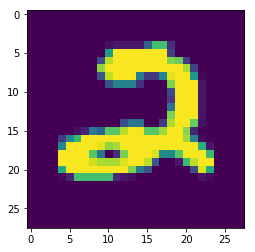

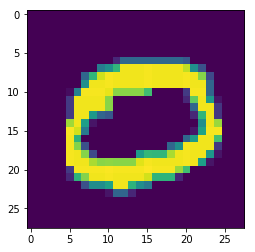

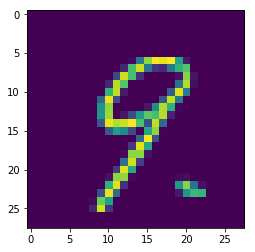

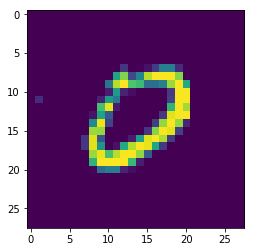

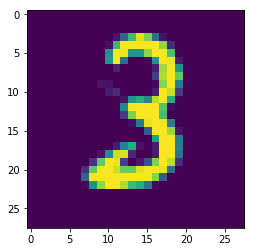

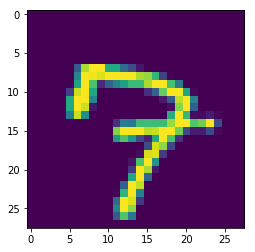

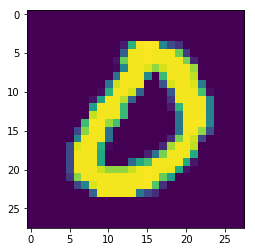

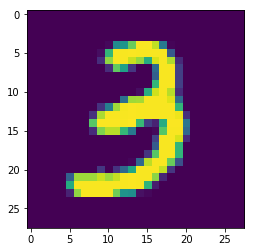

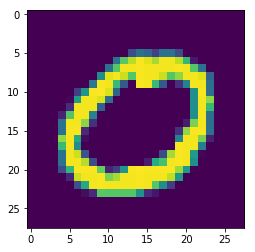

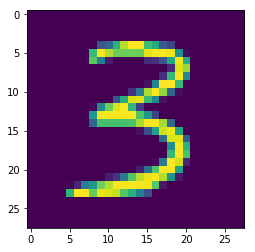

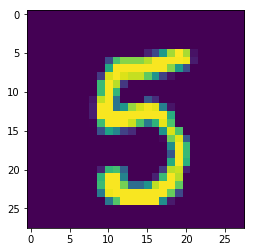

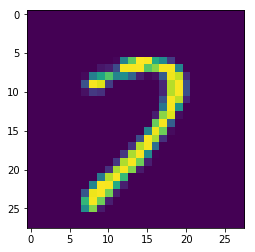

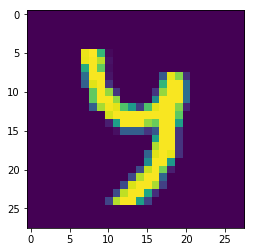

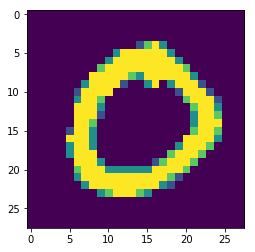

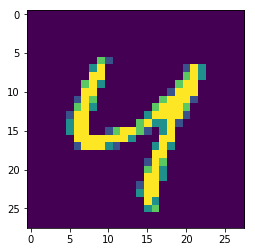

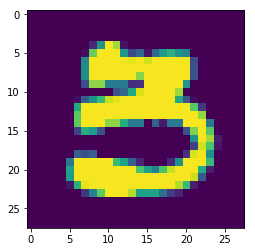

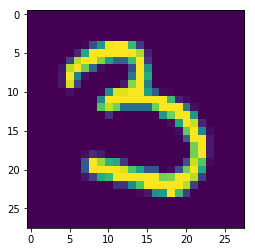

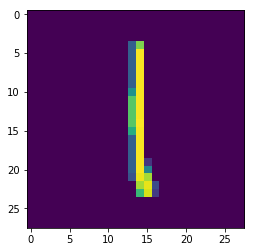

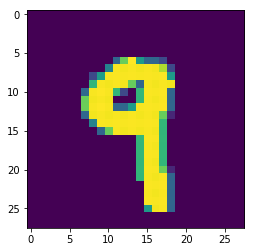

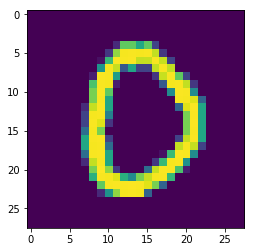

In [5]:
images=[row_to_image(i[1]) for i in test.head(20).iterrows()]
for image in images:
    plt.figure()
    plt.imshow(image)
    plt.show()


In [6]:
train_frame=h2o.H2OFrame(train)
test_frame=h2o.H2OFrame(test)
train_frame.names
len(train_frame.names)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


785

In [7]:
predictors  = list(range(1,785))
resp        = 0

train_frame[predictors] = train_frame[predictors]
train_frame[resp] = train_frame[resp].asfactor()

In [8]:
split_frames=train_frame.split_frame([0.75])
split_train=split_frames[0]
split_validation=split_frames[1]

In [10]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.grid.grid_search import H2OGridSearch

In [12]:
hyper_parameters = {'activation': ["rectifier", "rectifier_with_dropout"], 
                    'hidden':[[200,200,200],[100,100,100],[200,200,200,200,200],[100,100,100,100,100]],
                    'input_dropout_ratio':[0.1,0.2,0.3]}

In [13]:
model4=H2OGridSearch(H2ODeepLearningEstimator(),hyper_parameters)

In [14]:
model4.train(x=predictors,y=resp,training_frame=train_frame)

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [ ]:
#model3.train(x=predictors,y=resp,training_frame=split_train,validation_frame=split_validation)
#model3.train(x=predictors,y=resp,training_frame=train_frame)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [15]:
model4.show()

                activation                     hidden input_dropout_ratio  \
0                Rectifier            [200, 200, 200]                 0.1   
1                Rectifier            [100, 100, 100]                 0.1   
2                Rectifier            [200, 200, 200]                 0.2   
3                Rectifier  [200, 200, 200, 200, 200]                 0.1   
4                Rectifier  [200, 200, 200, 200, 200]                 0.2   
5                Rectifier  [100, 100, 100, 100, 100]                 0.1   
6                Rectifier            [200, 200, 200]                 0.3   
7                Rectifier            [100, 100, 100]                 0.2   
8                Rectifier  [100, 100, 100, 100, 100]                 0.2   
9                Rectifier  [200, 200, 200, 200, 200]                 0.3   
10               Rectifier  [100, 100, 100, 100, 100]                 0.3   
11               Rectifier            [100, 100, 100]                 0.3   

In [31]:
best_model_id=model4.sorted_metric_table().ix[0].model_ids
best_model=h2o.get_model(best_model_id)

In [36]:
preds=best_model.predict(test_frame)[0]

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [37]:
submission=h2o.H2OFrame(list(range(1,28001))).cbind(preds)
print (submission)

Parse progress: |█████████████████████████████████████████████████████████| 100%


C1,predict
1,2
2,0
3,9
4,9
5,3
6,9
7,0
8,3
9,0
10,3


In [38]:
submission.set_names(['ImageId','Label'])
h2o.export_file(submission,'digit_sub-4-7.4.csv')

Export File progress: |███████████████████████████████████████████████████| 100%


In [13]:
h2o.remove_all()

,key
0,Key_Frame__upload_88dd671fd96f2ffab683f25a7768...
1,Key_Frame__upload_aedff5dda33fcfe06fe3147c48d2...
2,py_2_sid_bdab_splitter
3,py_3_sid_bdab
4,py_4_sid_bdab
5,py_8_sid_bdab_splitter


TypeError: 'module' object is not callable